In [1]:
library(tidyverse)
library(data.table)

library(repr)
options(repr.plopt.width=5,repr.plot.height=5)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
install.packages("devtools")
devtools::install_github("kassambara/datarium")
library(datarium)
# 세 개의 광고 매체(youtube, facebook, newspaper)가 판매에 미치는 영향을 포함하는 데이터 프레임
data("marketing", package = "datarium")
str(marketing)
marketing %>% summary()
marketing %>% as_tibble() %>% show()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpUSWR5v/remotesc047e542a7/kassambara-datarium-f65be1d/DESCRIPTION’ ... OK
* preparing ‘datarium’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘datarium_0.1.0.999.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

# A tibble: 200 × 4
   youtube facebook newspaper sales
     <dbl>    <dbl>     <dbl> <dbl>
 1   276.     45.4       83.0 26.5 
 2    53.4    47.2       54.1 12.5 
 3    20.6    55.1       83.2 11.2 
 4   182.     49.6       70.2 22.2 
 5   217.     13.0       70.1 15.5 
 6    10.4    58.7       90    8.64
 7    69      39.4       28.2 14.2 
 8   144.     23.5       13.9 15.8 
 9    10.3     2.52       1.2  5.76
10   240.      3.12      25.4 12.7 
# ℹ 190 more rows


In [3]:
#3
cor(marketing)

,youtube,facebook,newspaper,sales
youtube,1.00000000,0.05480866,0.05664787,0.7822244
facebook,0.05480866,1.00000000,0.35410375,0.5762226
newspaper,0.05664787,0.35410375,1.00000000,0.2282990
sales,0.78222442,0.57622257,0.22829903,1.0000000


In [4]:
install.packages("GGally")
install.packages("PerformanceAnalytics")
install.packages("corrr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘ggrepel’, ‘seriation’




Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


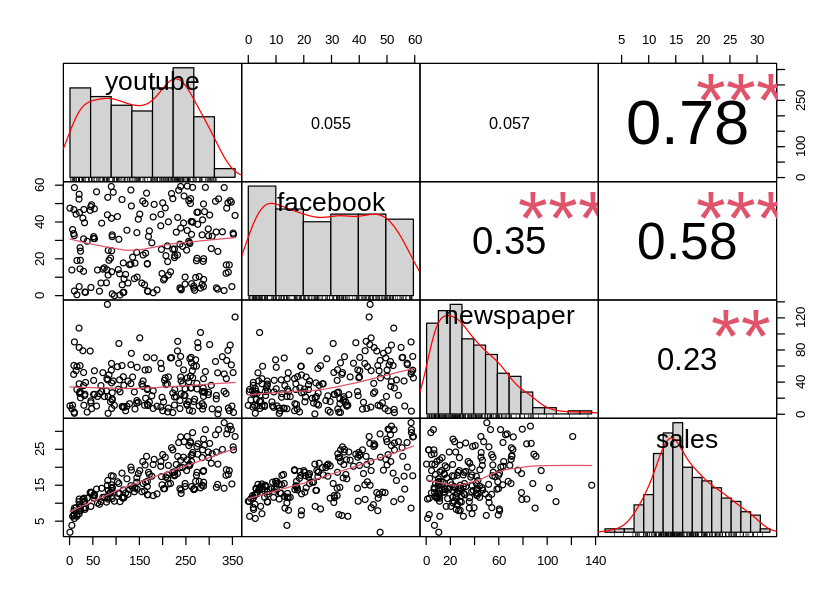

In [5]:
PerformanceAnalytics::chart.Correlation(marketing,histogram=TRUE,pch=19)

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


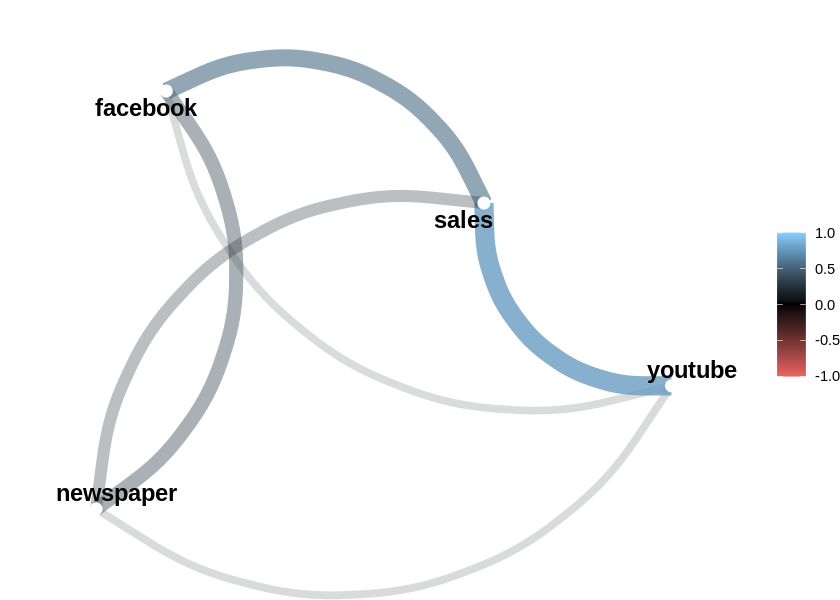

In [6]:
library(corrr)

marketing %>%
  correlate() %>%
  network_plot(min_cor = 0, colours = c("indianred2","black","skyblue1"))

In [7]:
#4
table(is.na(marketing))


FALSE 
  800 

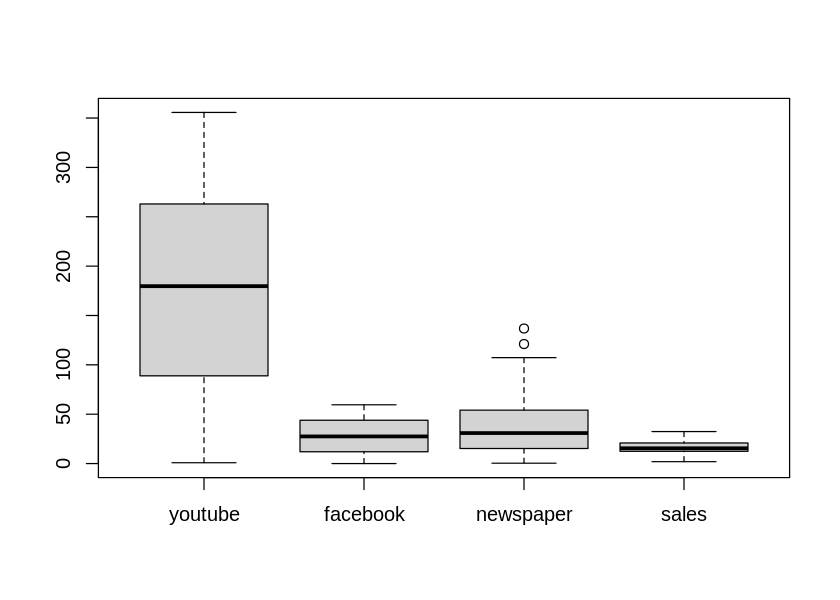

In [8]:
#5
boxplot(marketing)

In [9]:
#6
newspaper_upperfence <- summary(marketing$newspaper)[5] + IQR(marketing$newspaper, na.rm=T)*1.5
marketing$newspaper <-
  ifelse(marketing$newspaper > newspaper_upperfence,NA,marketing$newspaper)

marketing <- na.omit(marketing)

In [10]:
table(is.na(marketing))


FALSE 
  792 

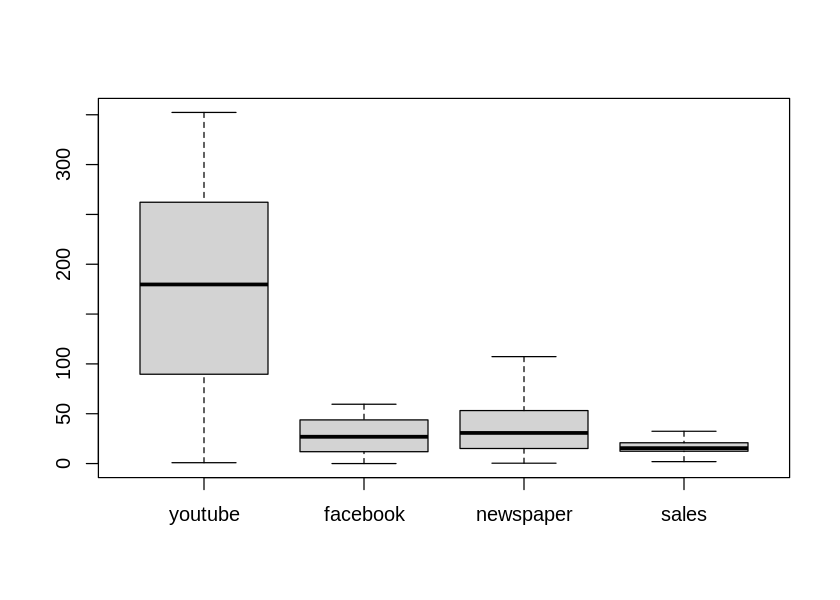

In [11]:
boxplot(marketing)

### 7
* 귀무가설 : youtube를 이용한 광고는 sales에 영향을 미치지 않는다.
* 대립가설 : youtube를 이용한 광고는 sales에 영향을 미친다.
* youtube(독립변수 or 설명변수)
* sales(종속변수 or 반응변수)
* 유의수준 : 0.05

In [12]:
#8
print("train_set")
train_set <- sample_frac(marketing,0.7,replace=F) %>% as_tibble()
train_set %>% show()

[1] "train_set"
# A tibble: 139 × 4
   youtube facebook newspaper sales
     <dbl>    <dbl>     <dbl> <dbl>
 1    82.8    11.2       1.08 11.2 
 2   240.      3.12     25.4  12.7 
 3   139.      9.24     27.7  13.2 
 4    74.8    15.1      22.0  11.6 
 5    22.4    14.5      28.1   8.04
 6   217.     13.0      70.1  15.5 
 7   299.     32.5      27.5  22.7 
 8   151.     44.3      95.0  19.1 
 9   197.     25.1      56.9  17.4 
10   225.     20.6      21.5  17.6 
# ℹ 129 more rows


In [13]:
#9
print("test_set")
test_set <- setdiff(marketing,train_set) %>% as_tibble()
test_set %>% show()

[1] "test_set"
# A tibble: 59 × 4
   youtube facebook newspaper sales
     <dbl>    <dbl>     <dbl> <dbl>
 1    53.4    47.2      54.1   12.5
 2    20.6    55.1      83.2   11.2
 3   182.     49.6      70.2   22.2
 4    79.3     6.96     29.0   10.3
 5   258.     28.8       4.8   20.9
 6    28.6    42.1      79.1   11.0
 7   117       9.12      8.64  11.6
 8   245.     39.5      55.2   22.8
 9   338.     47.5      67.0   29.3
10   349.      4.92     10.2   15.4
# ℹ 49 more rows


In [14]:
#10
print("sy_model = sales ~ youtube")
sy_model <- lm(formula = sales ~ youtube, data = train_set)
summary(sy_model)

[1] "sy_model = sales ~ youtube"



Call:
lm(formula = sales ~ youtube, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7626 -2.2615 -0.1902  2.3389  8.8935 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.34029    0.64781   12.88   <2e-16 ***
youtube      0.04693    0.00312   15.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.809 on 137 degrees of freedom
Multiple R-squared:  0.6228,	Adjusted R-squared:  0.6201 
F-statistic: 226.2 on 1 and 137 DF,  p-value: < 2.2e-16


##### 11
회귀식 : sales = 8.678137 + 0.046218*youtube
* p-값이 유의 수준 보다 작으므로 모델을 채택한다.
* R-squared가 0.588로 59%의 설명력을 갖는다.


In [15]:
#12
print("sn_model = sales ~ yotube")
sn_model <- lm(formula = sales ~ newspaper,data = train_set)
summary(sn_model)


[1] "sn_model = sales ~ yotube"



Call:
lm(formula = sales ~ newspaper, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.851  -4.217  -1.129   4.326  15.018 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.42435    0.90691  17.008   <2e-16 ***
newspaper    0.03903    0.02130   1.832   0.0691 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.127 on 137 degrees of freedom
Multiple R-squared:  0.02392,	Adjusted R-squared:  0.01679 
F-statistic: 3.357 on 1 and 137 DF,  p-value: 0.06908


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


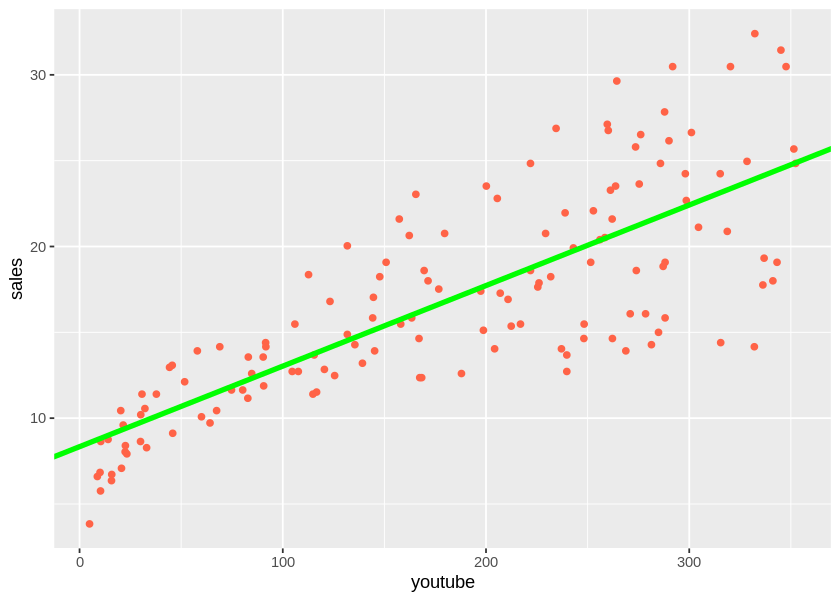

In [16]:
#13
#y절편 coef(sy_model)[1]
#기울기 coef(sy_model)[2]
train_set %>% ggplot(aes(x=youtube,y = sales)) + geom_point(color="tomato") +
  geom_abline(intercept=coef(sy_model)[1],slope=coef(sy_model)[2],color="green",size=1.5)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


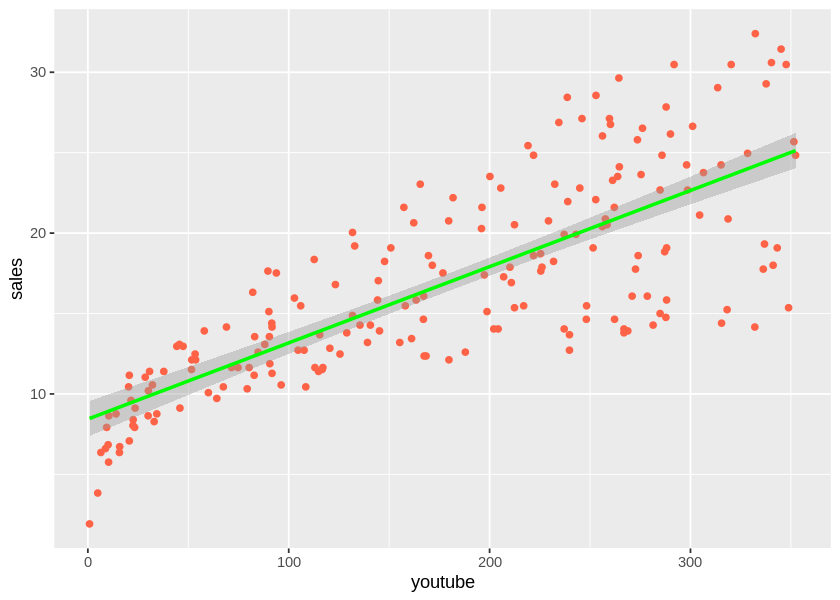

`geom_smooth()` using formula = 'y ~ x'


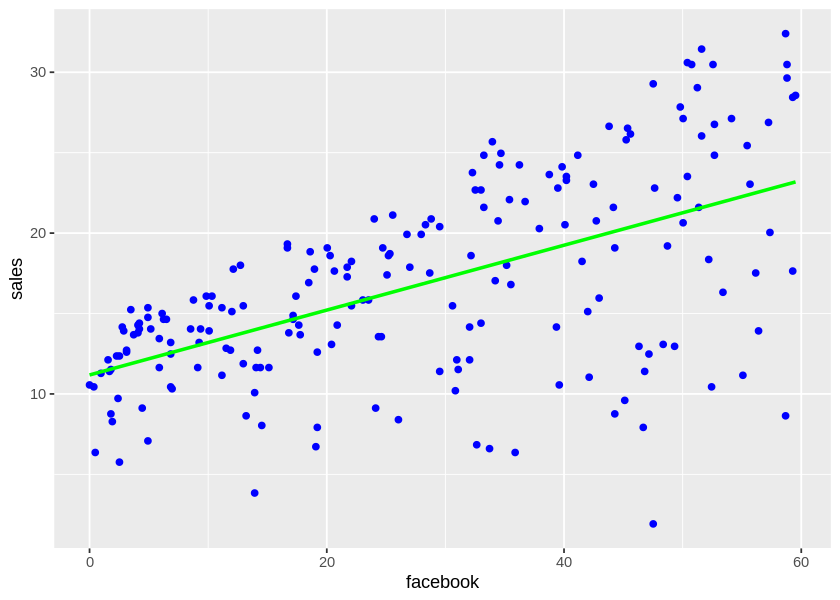

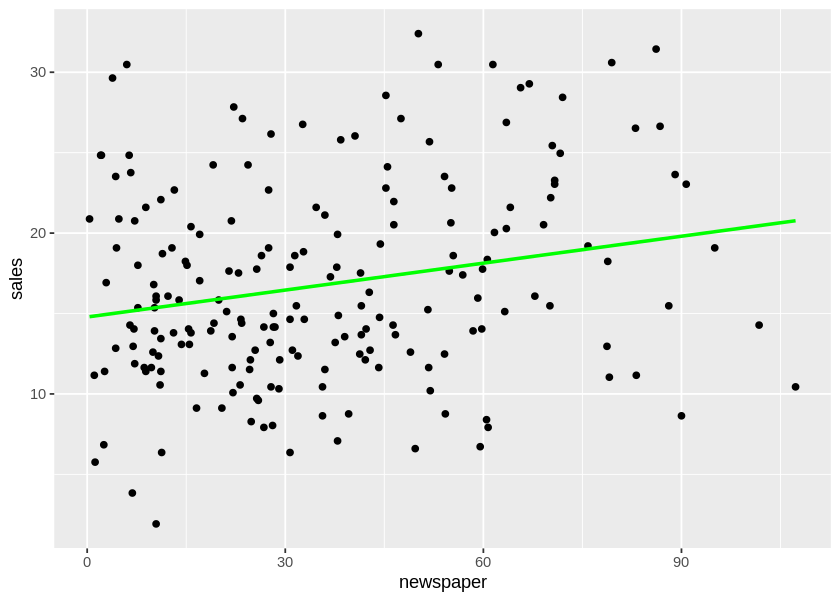

In [17]:

marketing %>% ggplot(aes(x = youtube,y = sales)) +
  geom_point(color = "tomato") +
  stat_smooth(method = "lm",color = "green")

marketing %>% ggplot(aes(x=facebook,y=sales)) +
  geom_point(color = "blue") +
  stat_smooth(method = "lm",se = F,color="green")

marketing %>% ggplot(aes(x=newspaper,y=sales)) +
  geom_point(color="black") +
  stat_smooth(method = "lm",se = F,color = "green")

In [18]:
#14
print("yfn_model = sales ~ youtube + facebook + newspaper")
yfn_model <- lm(sales ~ youtube + facebook + newspaper, data = train_set)
summary(yfn_model)

[1] "yfn_model = sales ~ youtube + facebook + newspaper"



Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8180 -0.9859  0.2781  1.2938  2.8175 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.726922   0.415398   8.972 2.16e-15 ***
youtube      0.043943   0.001512  29.067  < 2e-16 ***
facebook     0.197938   0.009583  20.654  < 2e-16 ***
newspaper   -0.003808   0.006638  -0.574    0.567    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.837 on 135 degrees of freedom
Multiple R-squared:  0.9135,	Adjusted R-squared:  0.9116 
F-statistic: 475.2 on 3 and 135 DF,  p-value: < 2.2e-16


회귀식 : 3.938712 + 0.043410*youtube + 0.191614*facebook
1. 제일 밑에 F-statistic의 p값은 2.2e-16으로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.
2. 중간의 coefficients에는 y절편 값 및 변수들의 p값이 나와있다. newspaper 변수의 경우 NA로 sales를 설명하는데 유의하지 않다.
3. R-squared값은 0.9088로 91%의 설명력을 갖는다.

In [19]:
#15
print("new_model = sales ~ youtube + facebook")
new_model <- lm(sales ~ youtube + facebook, data = train_set)
summary(new_model)


[1] "new_model = sales ~ youtube + facebook"



Call:
lm(formula = sales ~ youtube + facebook, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9810 -0.9808  0.2837  1.2223  2.8384 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.634367   0.381838   9.518   <2e-16 ***
youtube     0.043939   0.001508  29.137   <2e-16 ***
facebook    0.196453   0.009204  21.344   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.833 on 136 degrees of freedom
Multiple R-squared:  0.9133,	Adjusted R-squared:  0.912 
F-statistic: 716.2 on 2 and 136 DF,  p-value: < 2.2e-16


In [20]:
install.packages("scatterplot3d")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
library(scatterplot3d)

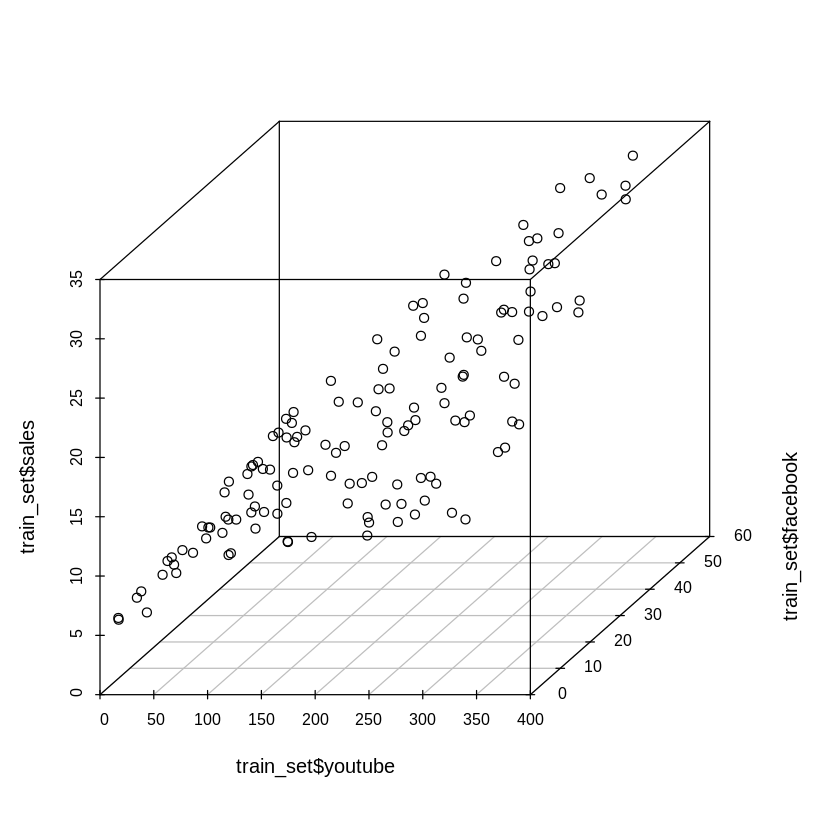

In [22]:
#16
options(repr.plot.width = 7, repr.plot.height=7)
scatterplot3d(train_set$youtube, train_set$facebook, train_set$sales, angle=40)

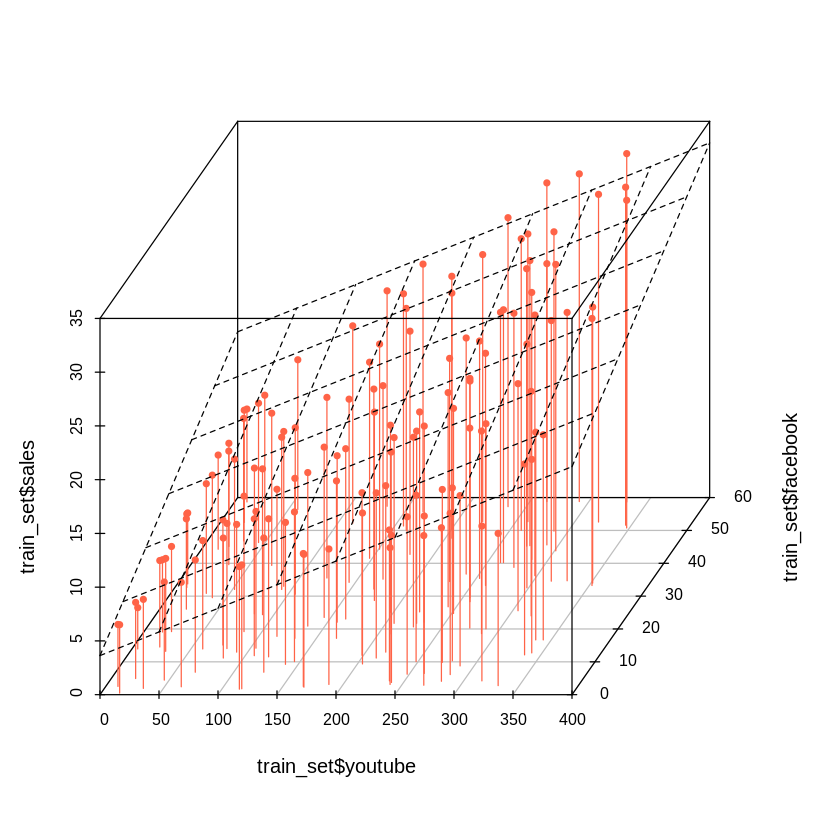

In [23]:
#17
s <- scatterplot3d(train_set$youtube, train_set$facebook, train_set$sales, pch=20,type = "h",angle=55,color="tomato")
s$plane3d(new_model)

In [24]:
#18
print("test_set을 이용한 predict")
test_set <- test_set %>% mutate(sales_predict = predict(new_model, test_set))
test_set %>% show()

[1] "test_set을 이용한 predict"
# A tibble: 59 × 5
   youtube facebook newspaper sales sales_predict
     <dbl>    <dbl>     <dbl> <dbl>         <dbl>
 1    53.4    47.2      54.1   12.5         15.2 
 2    20.6    55.1      83.2   11.2         15.4 
 3   182.     49.6      70.2   22.2         21.4 
 4    79.3     6.96     29.0   10.3          8.49
 5   258.     28.8       4.8   20.9         20.6 
 6    28.6    42.1      79.1   11.0         13.2 
 7   117       9.12      8.64  11.6         10.6 
 8   245.     39.5      55.2   22.8         22.2 
 9   338.     47.5      67.0   29.3         27.8 
10   349.      4.92     10.2   15.4         19.9 
# ℹ 49 more rows


In [25]:
sales_p <- predict(new_model, test_set)
test_set <- test_set %>% bind_cols(tibble(sales_predict = sales_p))
test_set %>% show()

New names:
• `sales_predict` -> `sales_predict...5`
• `sales_predict` -> `sales_predict...6`


# A tibble: 59 × 6
   youtube facebook newspaper sales sales_predict...5 sales_predict...6
     <dbl>    <dbl>     <dbl> <dbl>             <dbl>             <dbl>
 1    53.4    47.2      54.1   12.5             15.2              15.2 
 2    20.6    55.1      83.2   11.2             15.4              15.4 
 3   182.     49.6      70.2   22.2             21.4              21.4 
 4    79.3     6.96     29.0   10.3              8.49              8.49
 5   258.     28.8       4.8   20.9             20.6              20.6 
 6    28.6    42.1      79.1   11.0             13.2              13.2 
 7   117       9.12      8.64  11.6             10.6              10.6 
 8   245.     39.5      55.2   22.8             22.2              22.2 
 9   338.     47.5      67.0   29.3             27.8              27.8 
10   349.      4.92     10.2   15.4             19.9              19.9 
# ℹ 49 more rows
